## About dataset

#### Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

**1. pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. 
WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

**2. Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**3. Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**4. Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**5. Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**6. Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

**7. Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

**8. Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

**9. Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**10. Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

<h2>Importing libraries</h2>

In [1]:
# Install missing package(s) needed by this cell
%pip install plotly

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,f1_score,precision_score
import warnings
# svm
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\asus gaimer HQ I5\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
main_df = pd.read_csv("../data/water_potability.csv")
df = main_df.copy()

In [3]:
# Getting top 5 row of the dataset

df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
print(df.shape)

(3276, 10)


In [5]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [6]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
print(df.nunique())

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64


In [9]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [10]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

<Axes: >

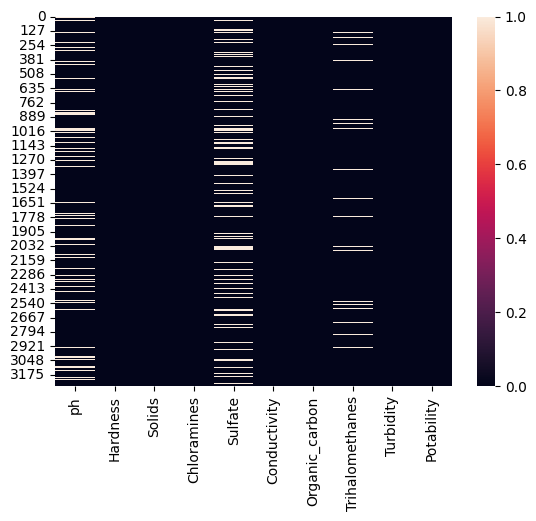

In [11]:
sns.heatmap(df.isnull())

<Axes: >

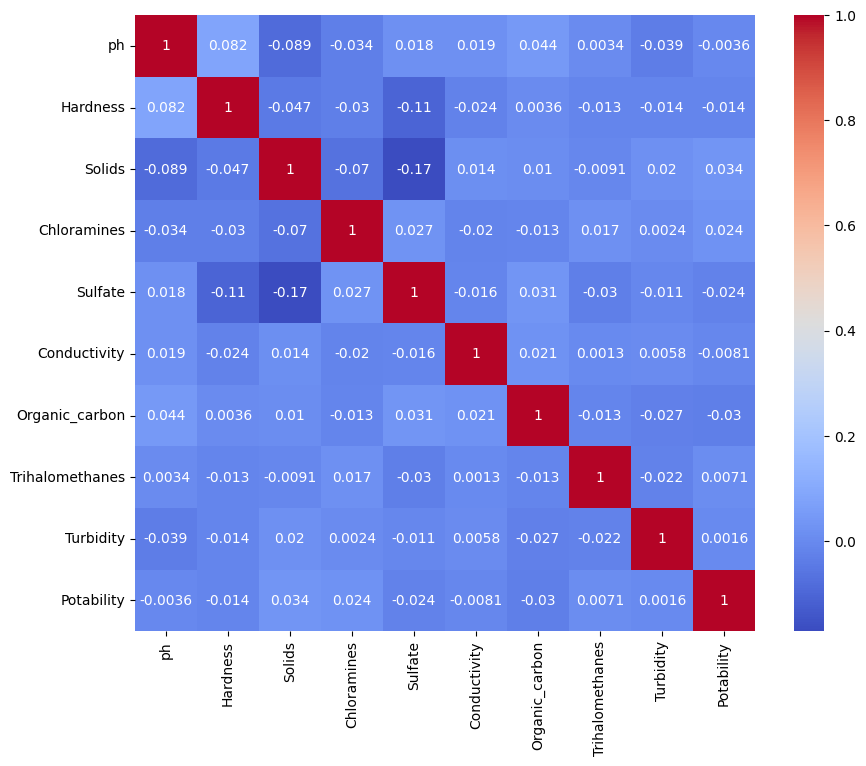

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

In [13]:
# Unstacking the correlation matrix to see the values more clearly.
corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]

Sulfate   Hardness          0.106923
ph        Solids            0.089288
Hardness  ph                0.082096
Solids    Chloramines       0.070148
Hardness  Solids            0.046899
ph        Organic_carbon    0.043503
dtype: float64

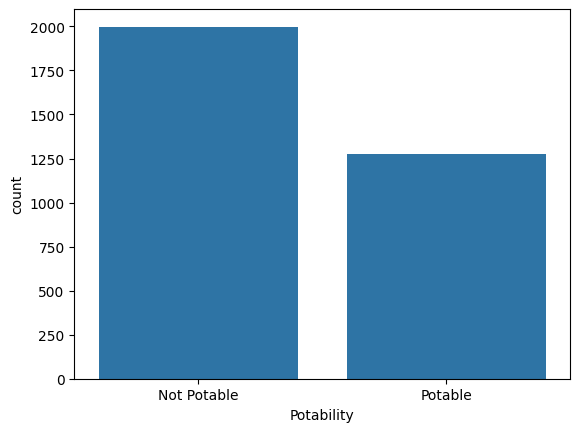

In [14]:
ax = sns.countplot(x = "Potability",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [15]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [16]:
#cleaning the data
df.fillna(df.mean(), inplace=True)

In [17]:
X = df.drop("Potability", axis=1)
y = df["Potability"]

## Balancing the Dataset
The dataset is imbalanced with 1998 non-potable samples vs 1278 potable samples. We'll use SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes.

In [18]:
# Install imbalanced-learn to provide imblearn (only run if not already installed)
%pip install imbalanced-learn

# Import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\asus gaimer HQ I5\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
# Apply SMOTE to balance the dataset before train-test split
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)


In [20]:
# Check the balanced class distribution
print("Balanced class distribution:")
print(pd.Series(y_balanced).value_counts())
print(f"\nOriginal dataset size: {len(y)}")
print(f"Balanced dataset size: {len(y_balanced)}")

Balanced class distribution:
Potability
0    1998
1    1998
Name: count, dtype: int64

Original dataset size: 3276
Balanced dataset size: 3996


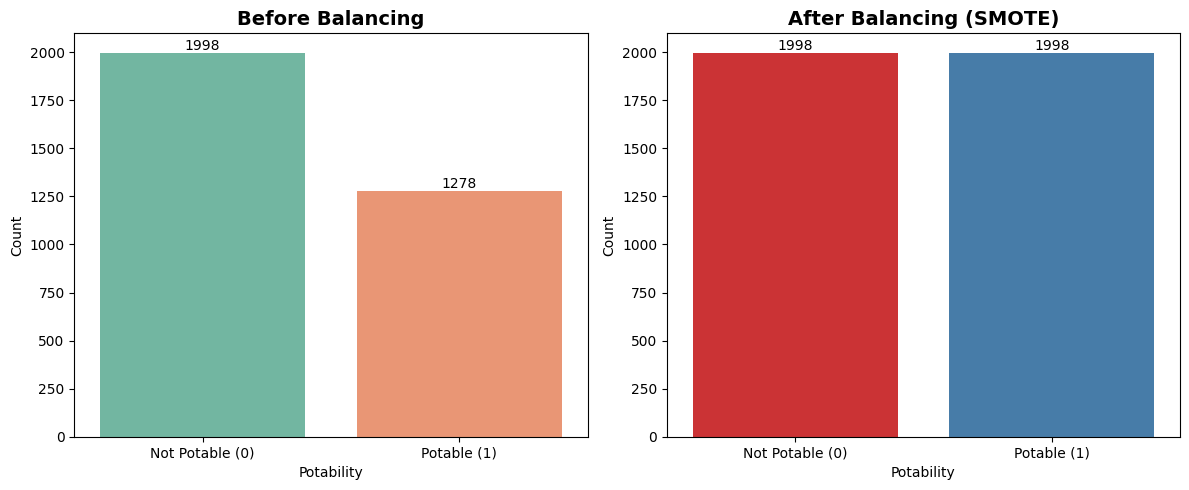

In [21]:
# Visualize the before and after balancing
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before balancing
ax1 = sns.countplot(x=y, ax=axes[0], palette='Set2')
axes[0].set_title('Before Balancing', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Potability')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Not Potable (0)', 'Potable (1)'])
for container in ax1.containers:
    ax1.bar_label(container)

# After balancing
ax2 = sns.countplot(x=y_balanced, ax=axes[1], palette='Set1')
axes[1].set_title('After Balancing (SMOTE)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Potability')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['Not Potable (0)', 'Potable (1)'])
for container in ax2.containers:
    ax2.bar_label(container)

plt.tight_layout()
plt.show()

In [22]:
balanced_df = pd.DataFrame(X_balanced, columns=df.columns[:-1])
balanced_df['Potability'] = y_balanced
balanced_df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

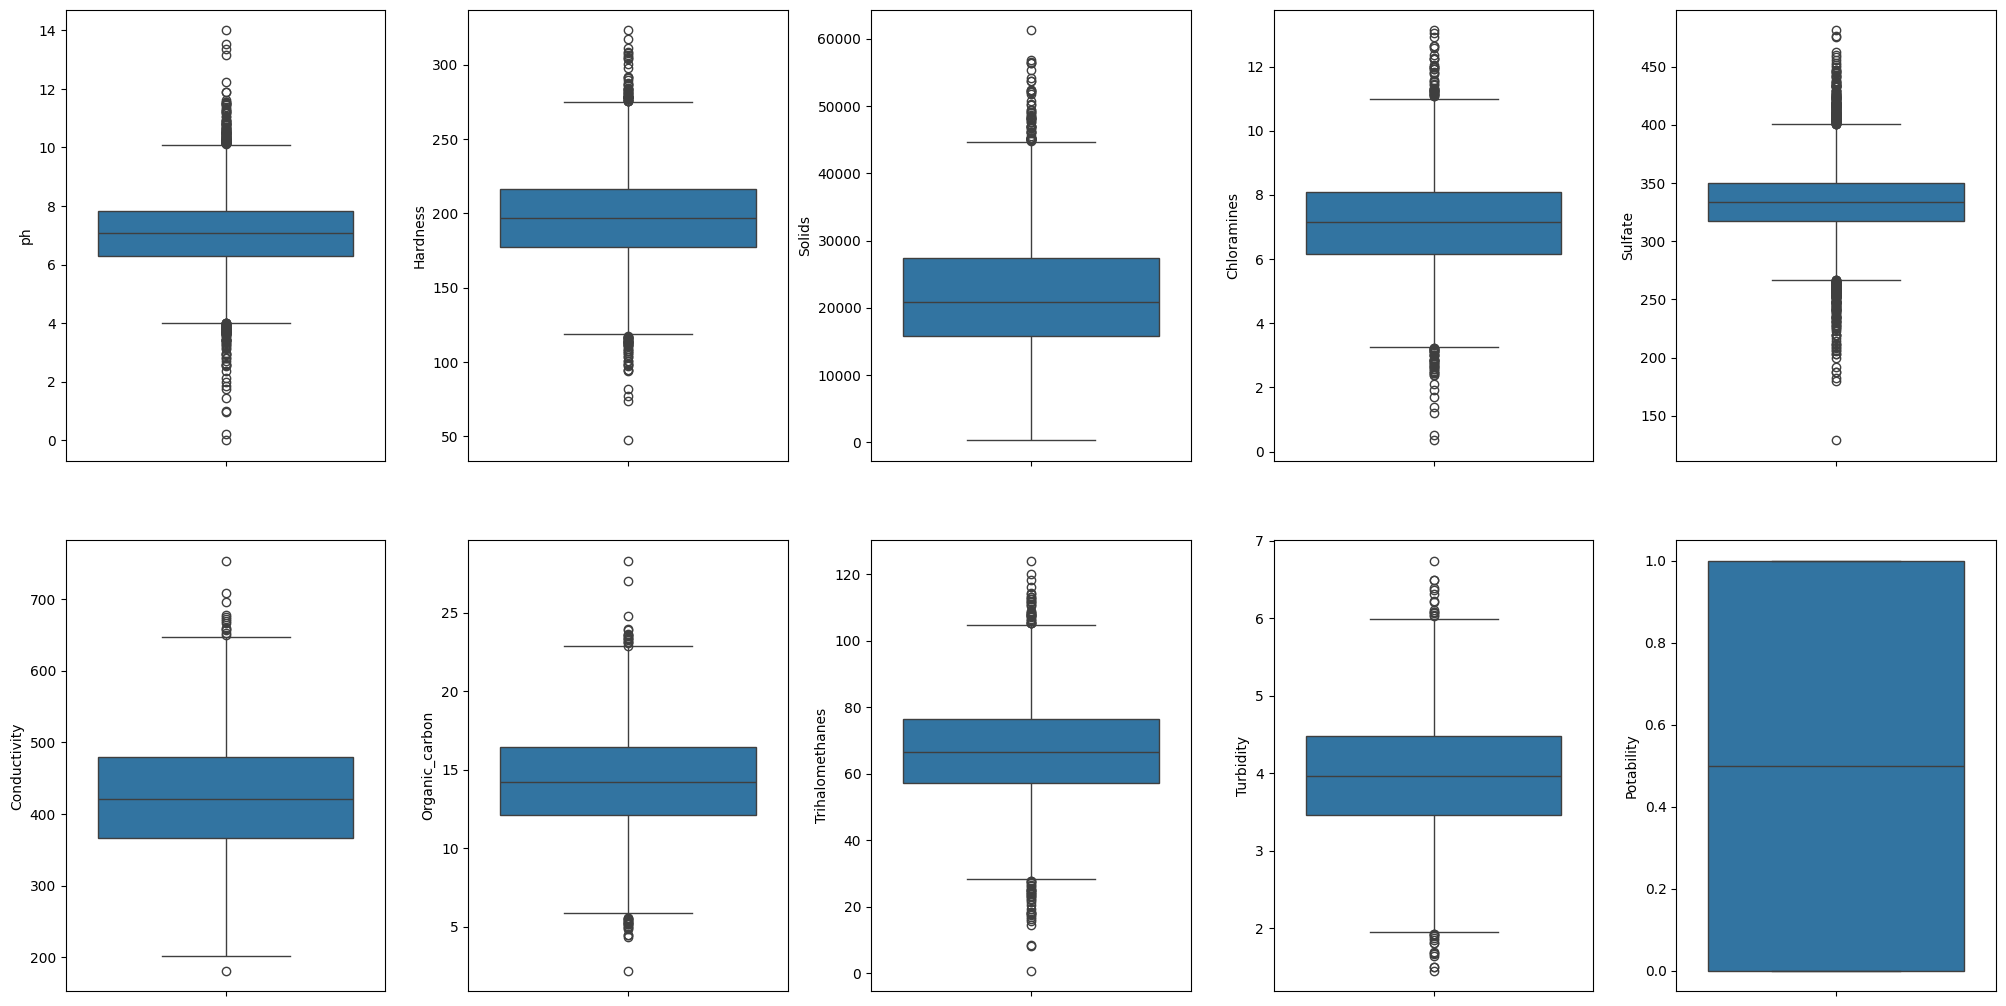

In [23]:
# Visualizing dataset and also checking for outliers 

fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in balanced_df.items():
    sns.boxplot(y=col, data=balanced_df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

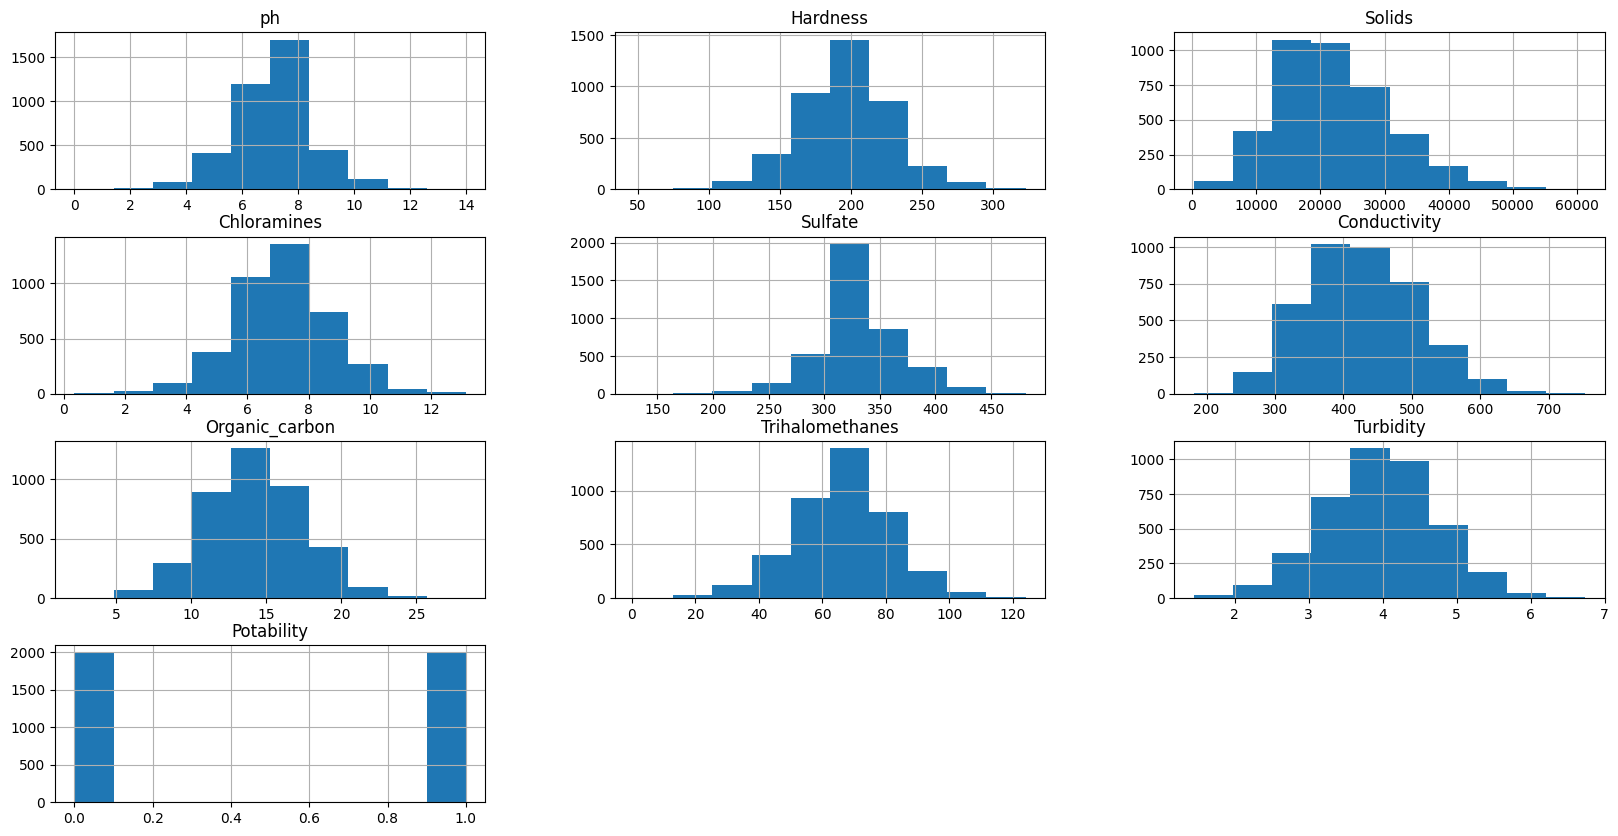

In [24]:
plt.rcParams['figure.figsize'] = [20,10]
balanced_df.hist()
plt.show()

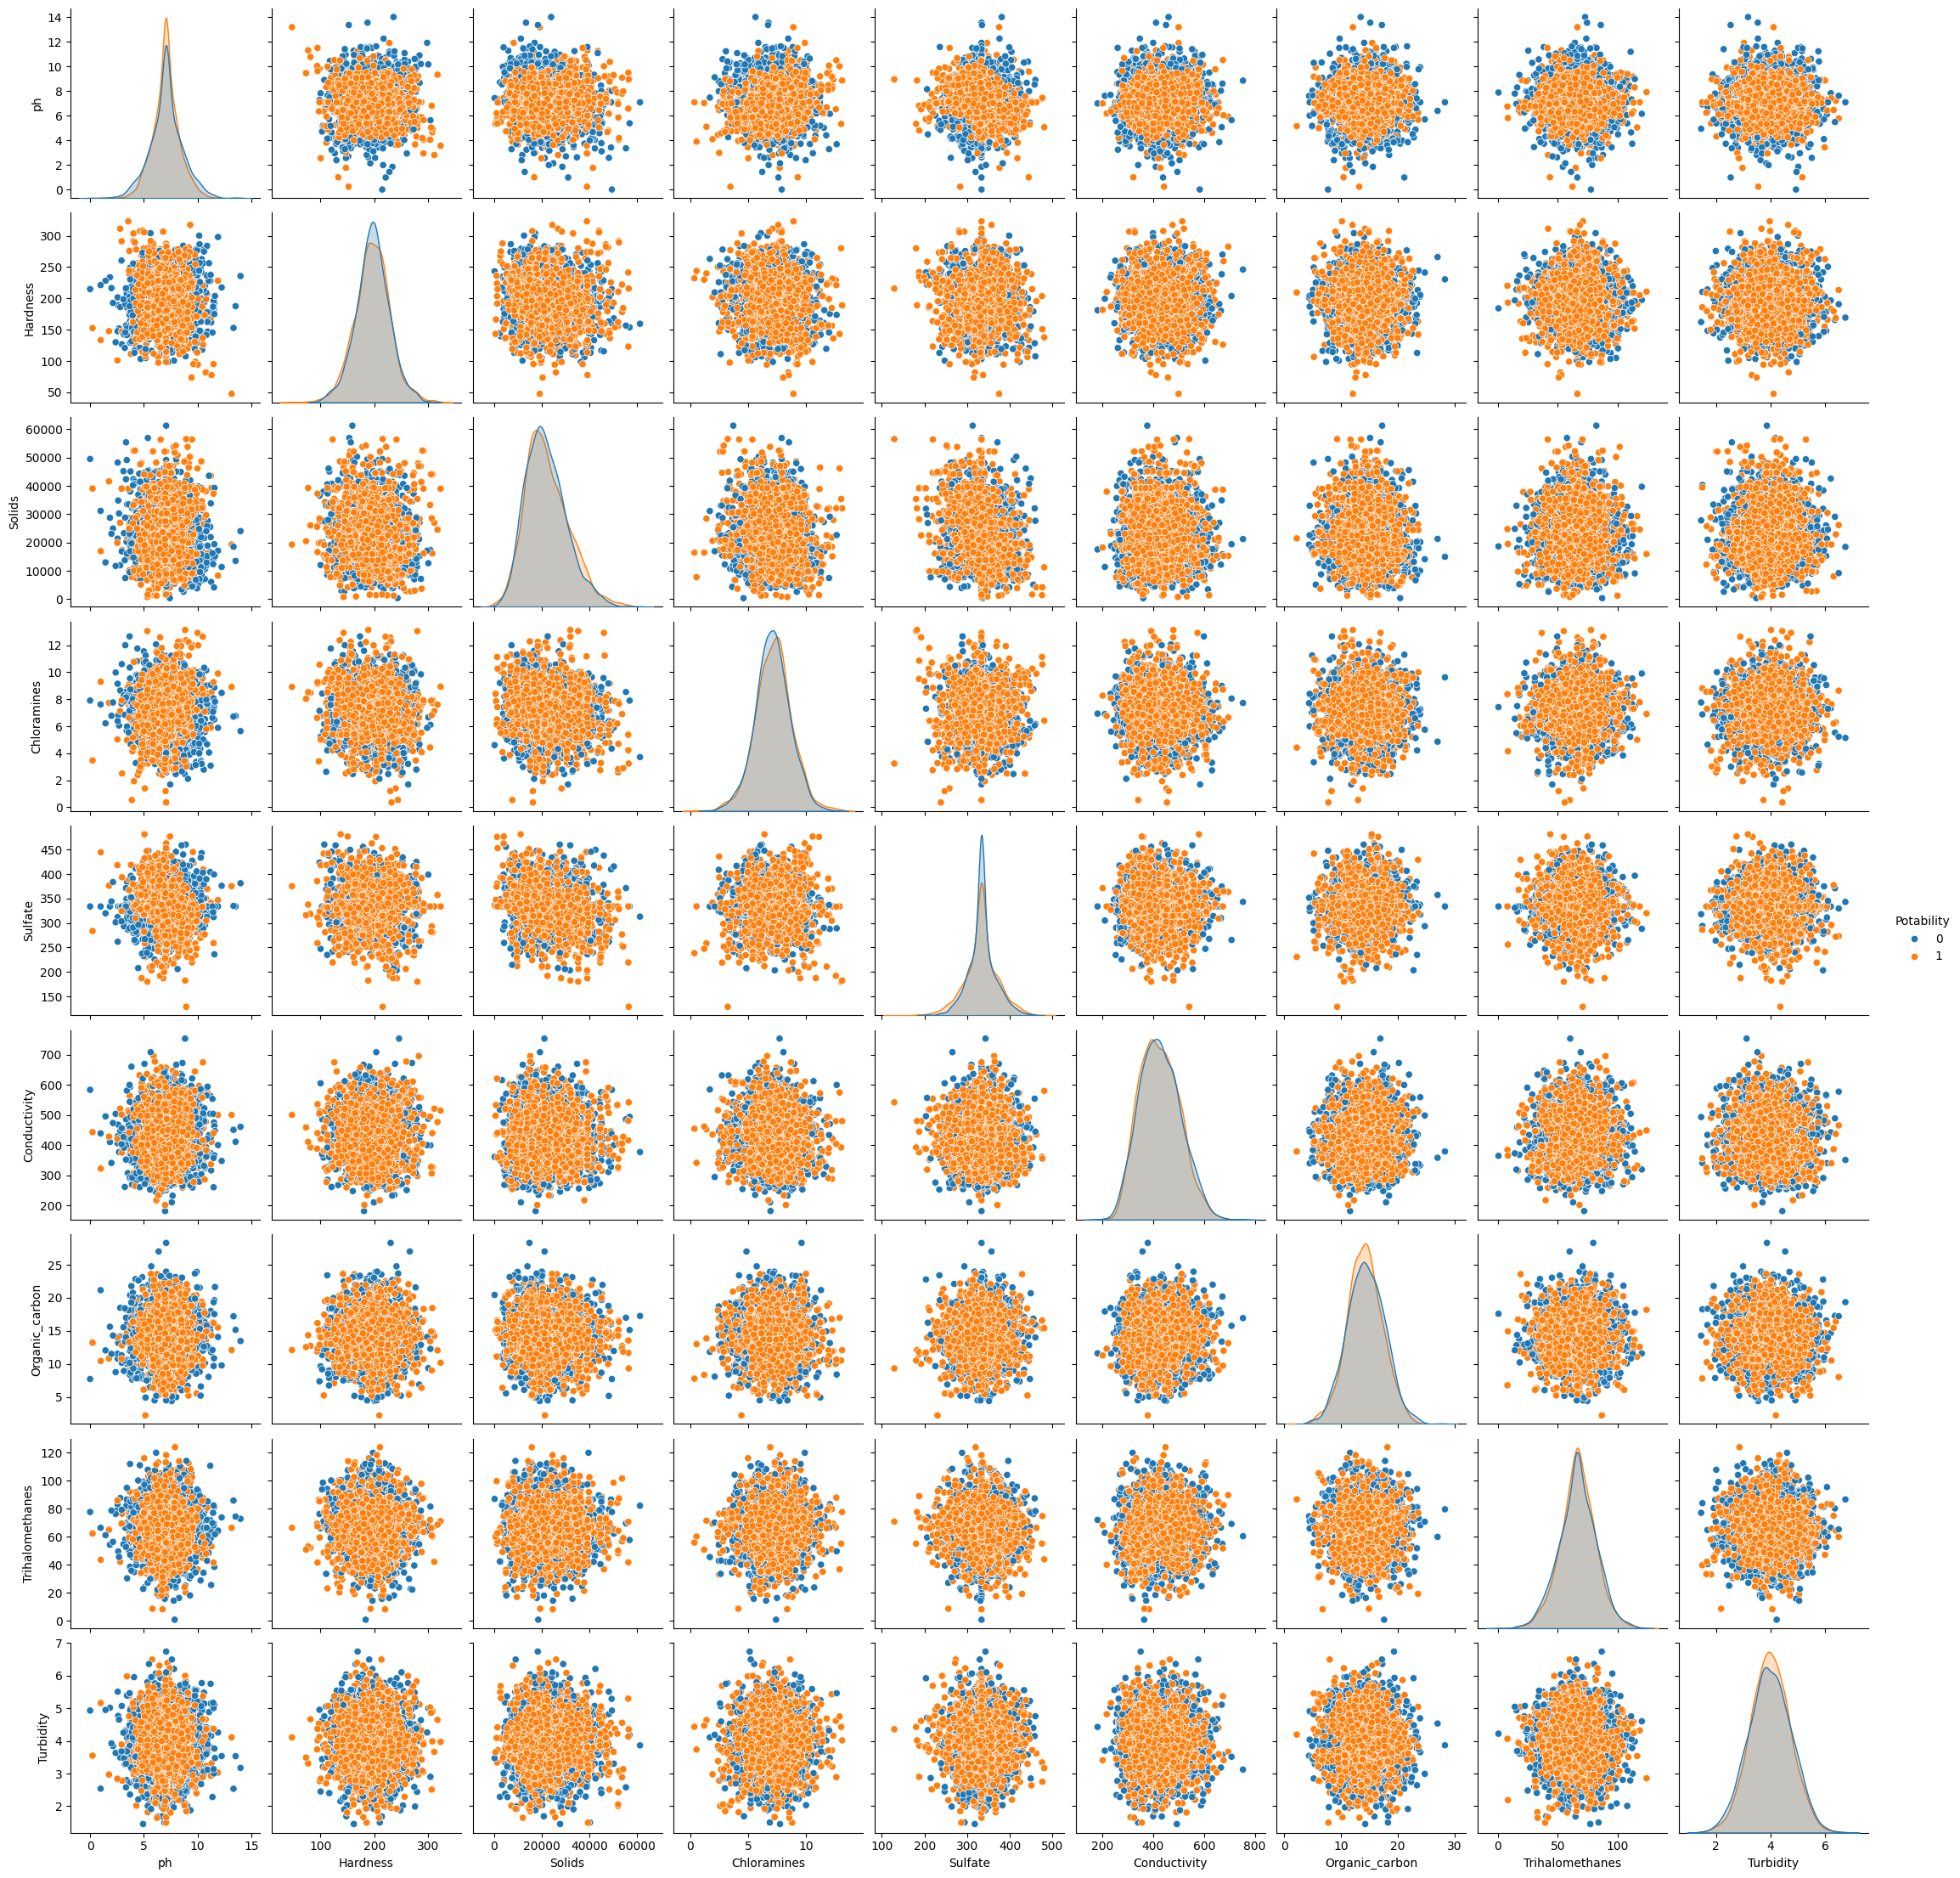

In [25]:
sns.pairplot(balanced_df, hue="Potability")

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

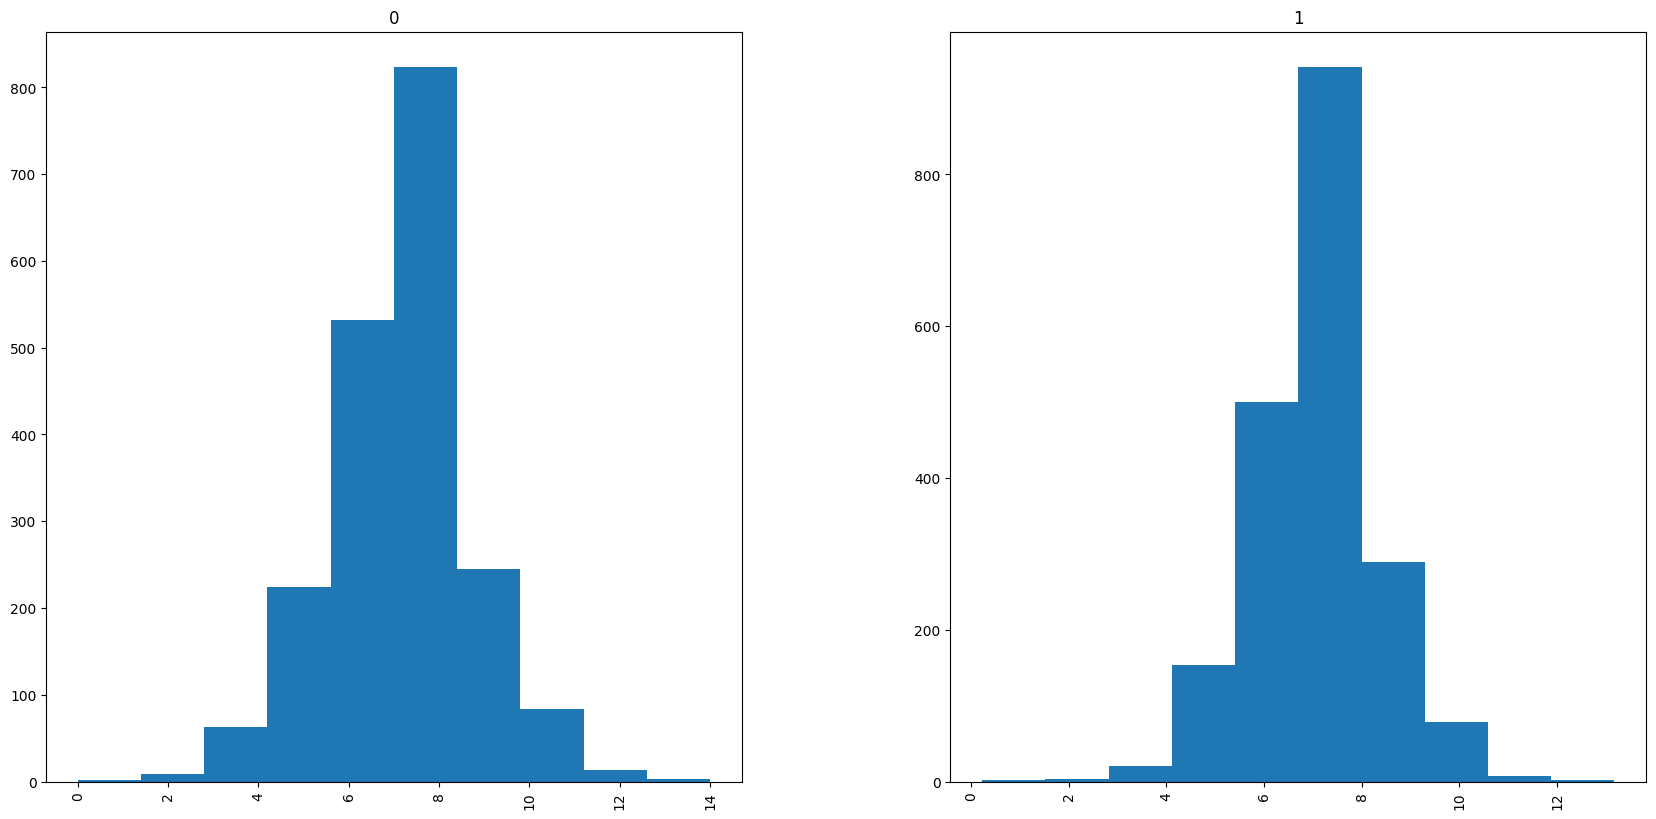

In [26]:
balanced_df.hist(column='ph', by='Potability')

In [27]:
# Ensure nbformat is available for Plotly's notebook rendering
%pip install "nbformat>=4.2.0" --quiet

fig = px.pie(balanced_df, names="Potability", hole=0.4, template="plotly_dark")
fig.show()


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\asus gaimer HQ I5\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [28]:
fig = px.scatter (balanced_df, x = "ph", y = "Sulfate", color = "Potability", template = "plotly_dark",  trendline="ols")
fig.show ()

In [29]:
fig = px.scatter (balanced_df, x = "Organic_carbon", y = "Hardness", color = "Potability", template = "plotly_dark",  trendline="lowess")
fig.show ()

In [30]:
balanced_df.isnull().mean()

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

In [31]:
balanced_df['ph'] = balanced_df['ph'].fillna(balanced_df['ph'].mean())
balanced_df['Sulfate'] = balanced_df['Sulfate'].fillna(balanced_df['Sulfate'].mean())
balanced_df['Trihalomethanes'] = balanced_df['Trihalomethanes'].fillna(balanced_df['Trihalomethanes'].mean())

In [32]:
balanced_df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [33]:
balanced_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [34]:
X = balanced_df.drop('Potability', axis=1)
y = balanced_df['Potability']

In [35]:
X.shape, y.shape

((3996, 9), (3996,))

In [36]:
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [37]:
X = scaler.fit_transform(X)
X

array([[ 9.89506814e-03,  2.60699194e-01, -1.43966348e-01, ...,
        -1.20055103e+00,  1.34381890e+00, -1.33184906e+00],
       [-2.38234413e+00, -2.08554427e+00, -3.87832904e-01, ...,
         2.86589360e-01, -6.60716152e-01,  7.02236977e-01],
       [ 7.33905452e-01,  8.62149420e-01, -2.43461952e-01, ...,
         8.09735261e-01, -1.01145132e-03, -1.20908008e+00],
       ...,
       [ 1.17944650e-01, -1.39915373e+00,  1.32086006e+00, ...,
        -1.47720180e-01,  4.87053296e-01,  4.66951515e-01],
       [ 4.54260300e-02, -4.87042665e-01,  9.26715096e-01, ...,
        -8.94568939e-01,  1.66336698e-01, -2.52984850e-01],
       [-4.09083192e-01,  1.60185924e+00, -4.93538819e-01, ...,
         3.59285486e-01,  9.53375308e-01,  7.80295572e-01]],
      shape=(3996, 9))

In [38]:
# import train-test split 
from sklearn.model_selection import train_test_split

In [39]:
# Use the balanced dataset for train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Using SVM

In [40]:
from sklearn.svm import SVC

In [41]:
model_svm = SVC(kernel='rbf', C=10,random_state = 42)

In [42]:
model_svm.fit(X_train, y_train)

SVC(C=10, random_state=42)

In [43]:
# Making Prediction
pred_svm = model_svm.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix
# Calculating Accuracy Score
accuracy = accuracy_score(y_test, pred_svm)
f1 = f1_score(y_test, pred_svm)
recall = recall_score(y_test, pred_svm)
precision = precision_score(y_test, pred_svm)
tn, fp, fn, tp = confusion_matrix(y_test,pred_svm).ravel()
specificity = tn / (tn + fp)
print(f"Accuracy score : {accuracy}")
print(f"F1_Score : {f1}")
print(f"Recall : {recall}")
print(f"Precision :{precision}")
print(f"Specifity : {specificity}")


Accuracy score : 0.6875
F1_Score : 0.6973365617433414
Recall : 0.7272727272727273
Precision :0.6697674418604651
Specifity : 0.6485148514851485


In [45]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       404
           1       0.67      0.73      0.70       396

    accuracy                           0.69       800
   macro avg       0.69      0.69      0.69       800
weighted avg       0.69      0.69      0.69       800



<Axes: >

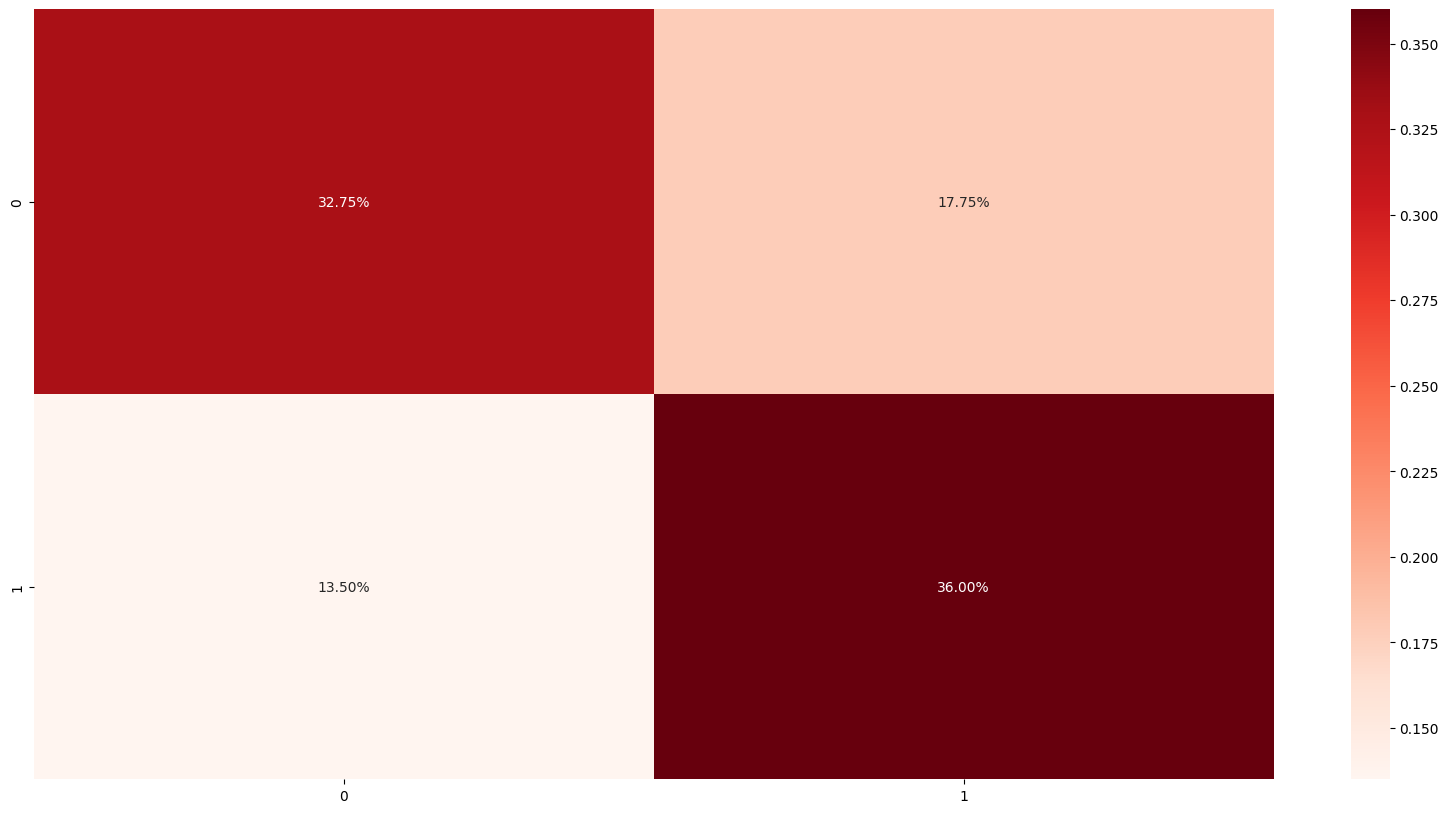

In [46]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')